## Hello World Machine Learning

In [68]:
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import MultinomialNB

In [5]:
porco1 = [1, 1, 0]
porco2 = [1, 1, 0]
porco3 = [1, 1, 0]
cachorro1 = [1, 1, 1]
cachorro2 = [0, 1, 1]
cachorro3 = [0, 1, 1]

In [6]:
# 1 => porco, 0 => cachorro
treino_x = [porco1, porco2,  porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1,1,1,0,0,0] # labels / etiquetas


In [7]:
model = LinearSVC()
model.fit(treino_x, treino_y)


LinearSVC()

In [8]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0, 1, 1]

previsoes = model.predict(teste_x)


In [9]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/total 
print("Taxa de acerto %.2f " % (taxa_de_acerto * 100))

Taxa de acerto 66.67 


In [11]:
model_2 = MultinomialNB()
model_2.fit(treino_x, treino_y)


MultinomialNB()

In [12]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0, 1, 1]

previsoes_2 = model_2.predict(teste_x)

In [13]:
corretos = (previsoes_2 == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/total 
print("Taxa de acerto %.2f " % (taxa_de_acerto * 100))

Taxa de acerto 66.67 


## Classificação 2

In [15]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv')
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [31]:
x = dados.iloc[:,:3]
x.columns = ['pagina_principal','como_funciona','contato']
y = dados.iloc[:,3]
y.columns = ['comprou']

In [37]:
dados.shape

(99, 4)

In [39]:
train_x = x[:75]
train_y = y[:75]
test_x = x[75:]
test_y = y[75:]


In [51]:
modelo = LinearSVC()
modelo.fit(train_x,train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes)
print(f'A acurácia foi {round(acuracia,2)*100} %')

A acurácia foi 96.0 %


### Biblioteca de treino e teste

In [61]:
SEED = 20

In [62]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25, random_state=SEED)
print(train_x.shape)
print(train_y.shape)

(74, 3)
(74,)


In [63]:
modelo = LinearSVC()
modelo.fit(train_x,train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes)
print(f'A acurácia foi {round(acuracia,2)*100} %')

A acurácia foi 96.0 %


In [67]:
train_y.value_counts(normalize=True)

0    0.635135
1    0.364865
Name: bought, dtype: float64

In [69]:
test_y.value_counts(normalize=True)

0    0.76
1    0.24
Name: bought, dtype: float64

In [71]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25, random_state=SEED,stratify=y)

modelo = LinearSVC()
modelo.fit(train_x,train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes)
print(f'A acurácia foi {round(acuracia,2)*100} %')

A acurácia foi 96.0 %


In [72]:
train_y.value_counts(normalize=True)

0    0.662162
1    0.337838
Name: bought, dtype: float64

In [73]:
test_y.value_counts(normalize=True)

0    0.68
1    0.32
Name: bought, dtype: float64

# Classificação 3

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()


,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)



<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

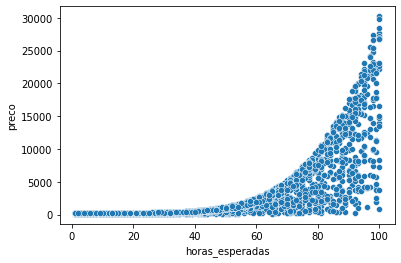

In [4]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

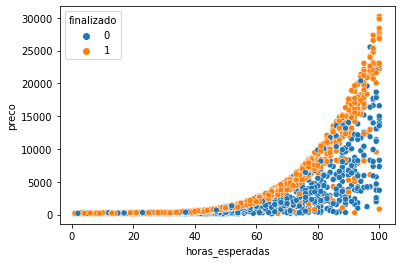

In [5]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)


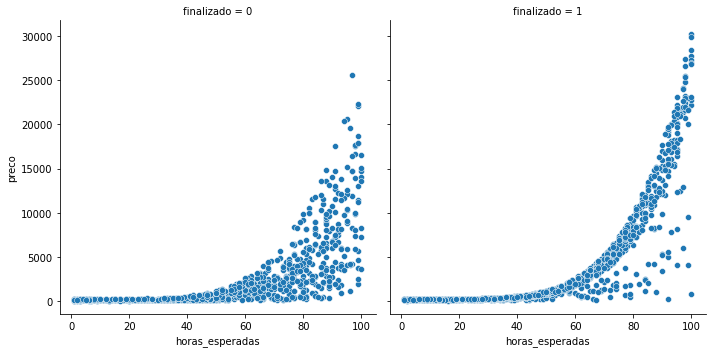

In [6]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

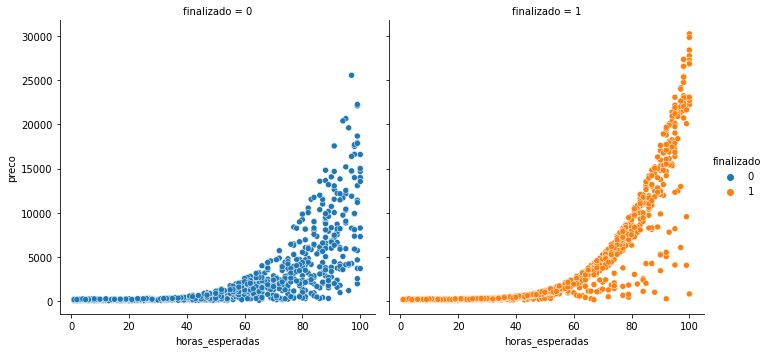

In [7]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)


In [8]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']


In [46]:
SEED = 100

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 52.22%


/home/franciscofoz/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [47]:
previsoes_dummy = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_do_guilherme) * 100
print("A acurácia da previsão dummy (de base) foi %.2f%%" % acuracia)

A acurácia da previsão dummy (de base) foi 52.59%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

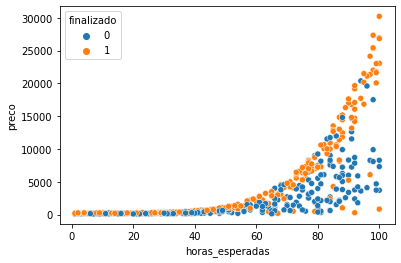

In [48]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x) 


In [49]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 30223


In [50]:

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)

Z = Z.reshape(xx.shape)
Z

/home/franciscofoz/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

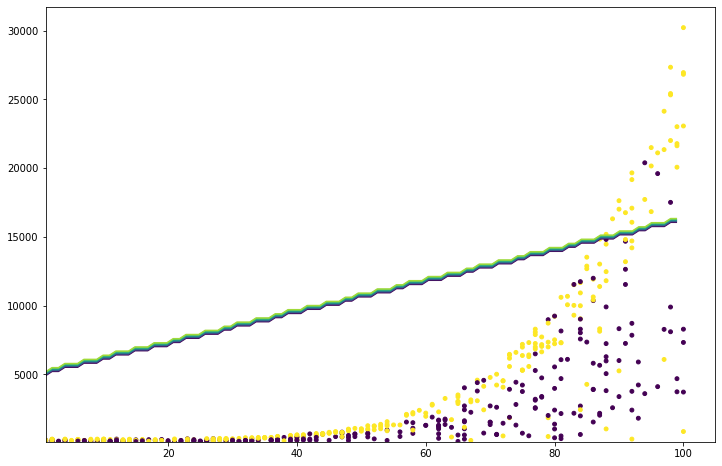

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.contour(xx,yy,Z)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y,s=15)

In [55]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07%


/home/franciscofoz/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


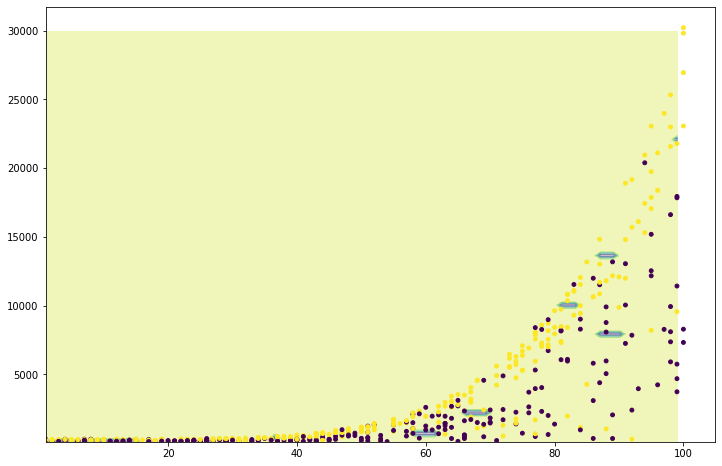

In [60]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12,8))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=15)

# DECISION BOUNDARY

In [62]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


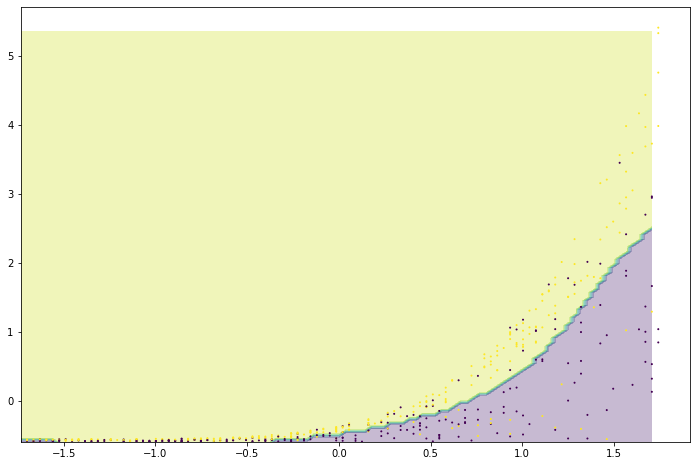

In [65]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


plt.figure(figsize=(12,8))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)


# Classificação 4

In [101]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [102]:
a_renomear = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}

dados = dados.rename(columns=a_renomear)
dados

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [103]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10000 non-null  int64  
 1   milhas_por_ano  10000 non-null  int64  
 2   ano_do_modelo   10000 non-null  int64  
 3   preco           10000 non-null  float64
 4   vendido         10000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 390.8+ KB


In [104]:
a_trocar = {
    'no': 0,
    'yes': 1
}

dados.vendido = dados.vendido.map(a_trocar)




In [105]:
dados

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0
9996,9996,13246,2002,107424.63,1
9997,9997,13018,2014,93856.99,0
9998,9998,10464,2011,51250.57,1


In [106]:
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [107]:
dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [109]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [110]:
x

,preco,idade_do_modelo,km_por_ano
0,30941.02,23,35085.22134
1,40557.96,25,12622.05362
2,89627.50,17,11440.79806
3,95276.14,8,43167.32682
4,117384.68,9,12770.11290
...,...,...,...
9995,97112.86,17,25060.64248
9996,107424.63,21,21317.31764
9997,93856.99,9,20950.38812
9998,51250.57,12,16840.13376


In [111]:
y

0       1
1       1
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    0
Name: vendido, Length: 10000, dtype: int64

In [113]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 10
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 58.00%


/home/franciscofoz/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
